In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open("data/test500.json", "r") as f:
    dataset = json.load(f)

In [3]:
plt.rcParams.update({
    "font.family": "STIXGeneral",     # serif font similar to Times New Roman
    "mathtext.fontset": "stix",
    "axes.unicode_minus": False,
})

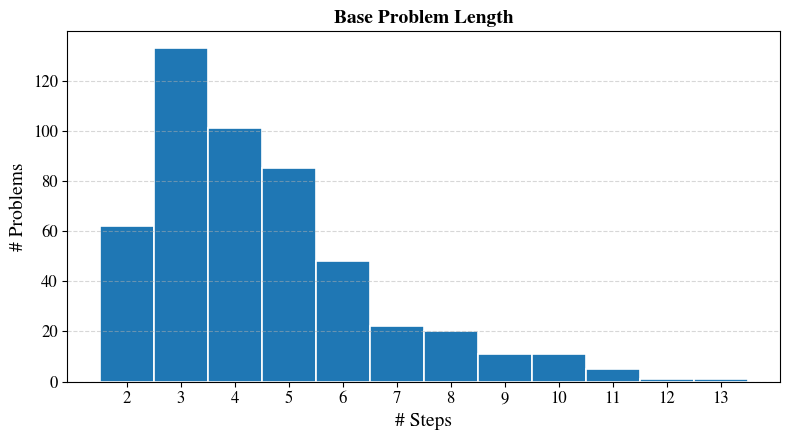

In [4]:
base_steps = [sum(dp["base"]["trees"]["base"]["rule_counts"].values()) for dp in dataset]

base_font_size = 14
min_step = int(np.min(base_steps))
max_step = int(np.max(base_steps))

bins = np.arange(min_step - 0.5, max_step + 1.5, 1.0)

plt.figure(figsize=(8,4.5))
plt.hist(base_steps, bins=bins, edgecolor='white', linewidth=1.2)

plt.title("Base Problem Length", fontsize=base_font_size, fontweight="bold")
plt.xlabel("# Steps", fontsize=base_font_size)
plt.ylabel("# Problems", fontsize=base_font_size)

plt.xticks(np.arange(min_step, max_step+1), fontsize=base_font_size-2)
plt.yticks(fontsize=base_font_size-2)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("figures/base_problem_length.pdf", dpi=500, bbox_inches='tight')

plt.show()

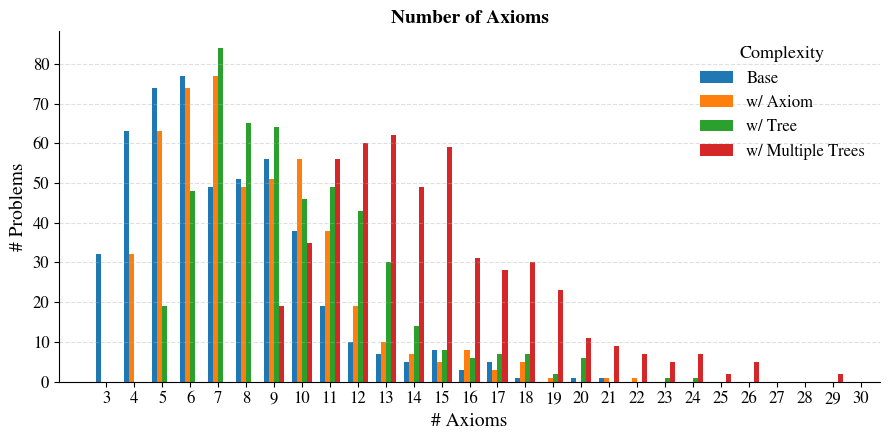

In [5]:
import numpy as np
import matplotlib.pyplot as plt

base_font_size = 14

num_axioms = {
    "Base": [dp["base"]["trees"]["base"]["width"] for dp in dataset],
    "w/ Axiom": [sum(t["width"] for t in dp["disconnected"]["simple"]["no_overlap"]["trees"].values()) for dp in dataset],
    "w/ Tree": [sum(t["width"] for t in dp["disconnected"]["complex"]["no_overlap"]["trees"].values()) for dp in dataset],
    "w/ Multiple Trees": [sum(t["width"] for t in dp["disconnected"]["more_complex"]["no_overlap"]["trees"].values()) for dp in dataset],
}

min_step = int(np.min(num_axioms["Base"]))
max_step = int(np.max(num_axioms["w/ Multiple Trees"]))
bins = np.arange(min_step, max_step + 1)

hist_data = {k: np.histogram(v, bins=bins)[0] for k, v in num_axioms.items()}

x = bins[:-1]  # bin centers
bar_width = 0.18  # narrower so 4 fit side-by-side
offsets = np.linspace(-1.5*bar_width, 1.5*bar_width, len(num_axioms))

plt.figure(figsize=(9, 4.5))
for (label, counts), offset in zip(hist_data.items(), offsets):
    plt.bar(x + offset, counts, width=bar_width, label=label)

plt.title("Number of Axioms", fontsize=base_font_size, fontweight="bold")
plt.xlabel("# Axioms", fontsize=base_font_size)
plt.ylabel("# Problems", fontsize=base_font_size)

plt.xticks(np.arange(min_step, max_step + 1), fontsize=base_font_size - 2)
plt.yticks(fontsize=base_font_size - 2)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.legend(title="Complexity", fontsize=base_font_size - 2,
           title_fontsize=base_font_size - 1, frameon=False, loc='upper right')

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig("figures/num_axioms_by_complexity.pdf", dpi=500, bbox_inches='tight', transparent=True)
plt.show()


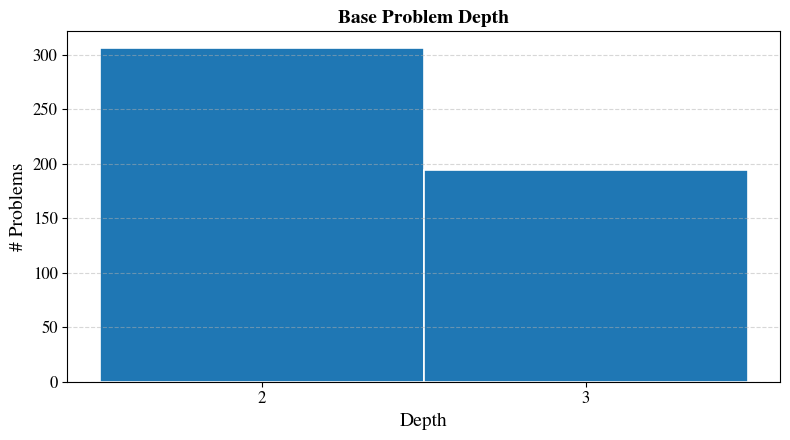

In [6]:
base_depth = [dp["base"]["trees"]["base"]["depth"] for dp in dataset]

base_font_size = 14
min_step = int(np.min(base_depth))
max_step = int(np.max(base_depth))

bins = np.arange(min_step - 0.5, max_step + 1.5, 1.0)

plt.figure(figsize=(8,4.5))
plt.hist(base_depth, bins=bins, edgecolor='white', linewidth=1.2)

plt.title("Base Problem Depth", fontsize=base_font_size, fontweight="bold")
plt.xlabel("Depth", fontsize=base_font_size)
plt.ylabel("# Problems", fontsize=base_font_size)

plt.xticks(np.arange(min_step, max_step+1), fontsize=base_font_size-2)
plt.yticks(fontsize=base_font_size-2)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("figures/base_problem_depth.pdf", dpi=500, bbox_inches='tight')

plt.show()